<a href="https://colab.research.google.com/github/prantoran/stock-markets-analytics-zoomcamp/blob/main/01-intro-and-data-sources/Module01_Colab_Introduction_and_Data_Sources_with_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install main library YFinance
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


# 1) Understanding Data-Driven Decisions data pulls

In [3]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=25
Period for indexes: 1954-04-25 to 2024-04-25 


## 1.1) GDP

In [4]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [5]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot.tail()

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2023-04-01,22246.23,0.021312,0.021312
2023-07-01,22369.71,0.021719,0.021719
2023-10-01,22495.19,0.022190,0.022190
2024-01-01,22618.15,0.022251,0.022251
2024-04-01,22739.00,0.022151,0.022151


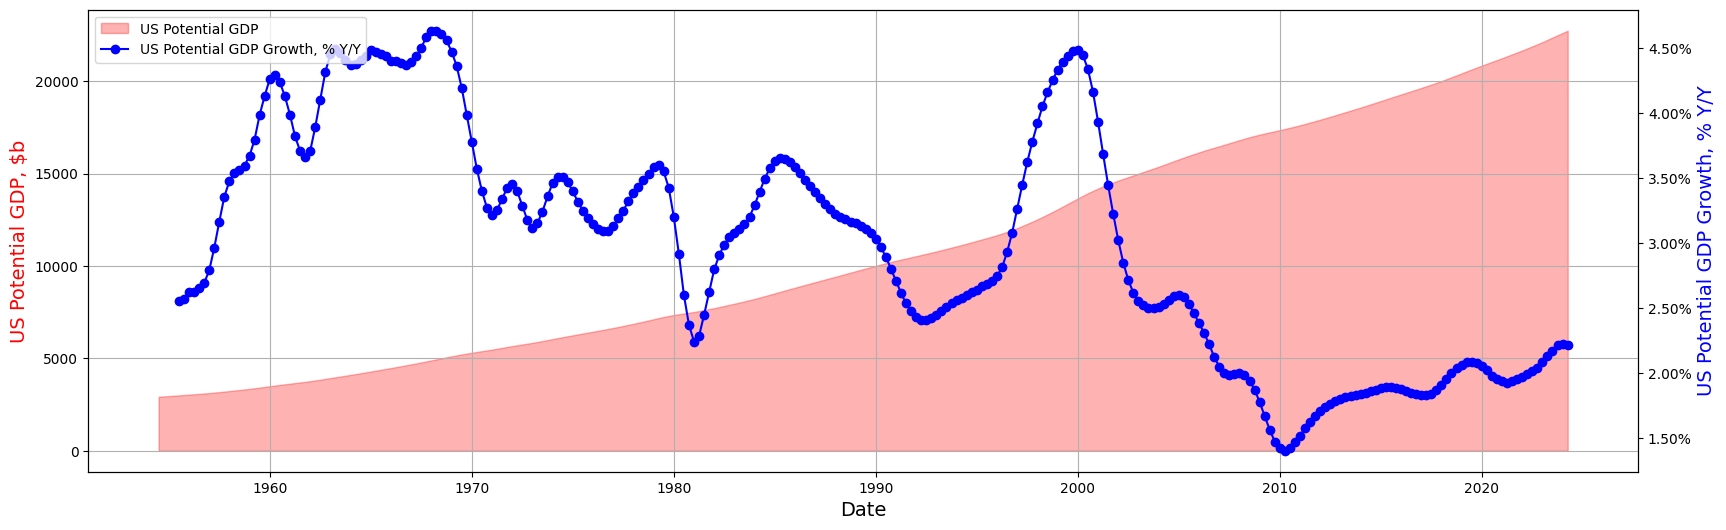

In [6]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.2) Inflation - CPI Core

In [7]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [8]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2023-03-01,305.112,0.055601,0.003249
2023-04-01,306.539,0.055157,0.004677
2023-05-01,307.646,0.053322,0.003611
2023-06-01,308.245,0.048552,0.001947
2023-07-01,308.945,0.047076,0.002271
2023-08-01,309.656,0.044128,0.002301
2023-09-01,310.644,0.041437,0.003191
2023-10-01,311.390,0.040217,0.002401
2023-11-01,312.349,0.040151,0.003080


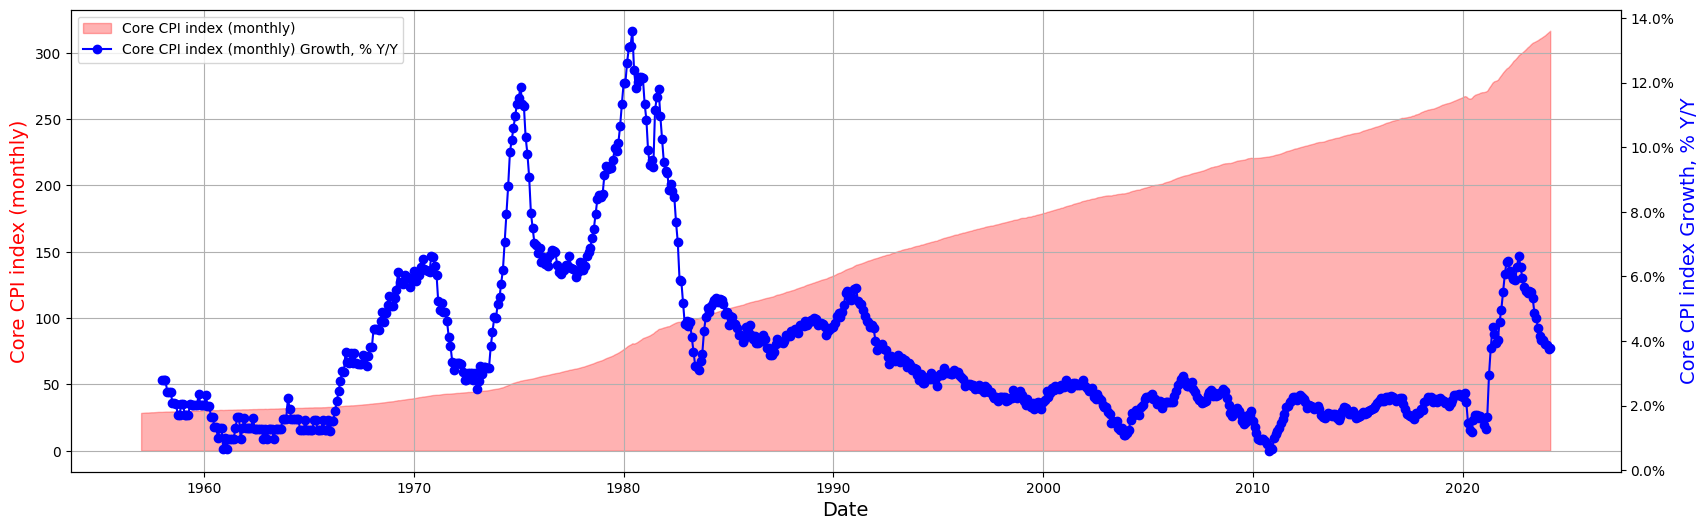

In [9]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## 1.3 Interest rates

In [10]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail()

,FEDFUNDS
DATE,
2023-11-01,5.33
2023-12-01,5.33
2024-01-01,5.33
2024-02-01,5.33
2024-03-01,5.33


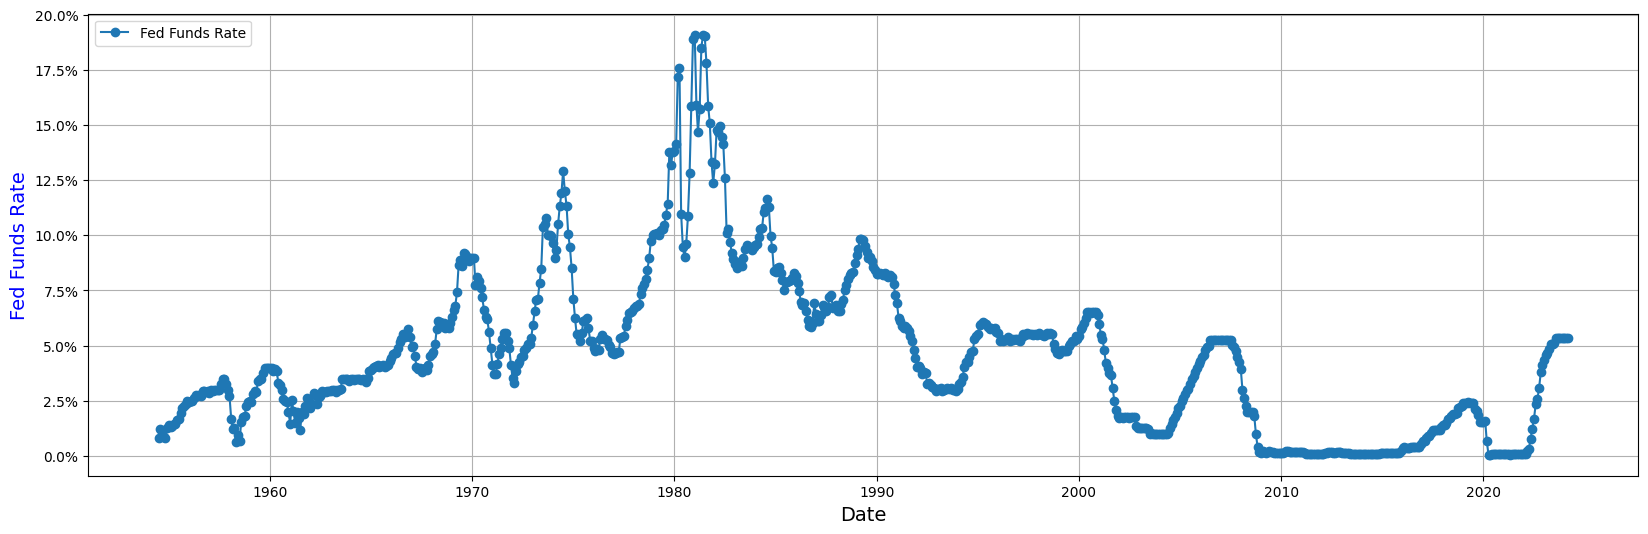

In [11]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()

In [12]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2024-04-17,5.16
2024-04-18,5.18
2024-04-19,5.17
2024-04-22,5.16
2024-04-23,5.14


Other rates for US Treasury: https://fred.stlouisfed.org/categories/115  
* https://fred.stlouisfed.org/series/DGS2
* https://fred.stlouisfed.org/series/DGS3
* https://fred.stlouisfed.org/series/DGS5
* https://fred.stlouisfed.org/series/DGS10
...

In [13]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2024-04-17,4.62
2024-04-18,4.68
2024-04-19,4.66
2024-04-22,4.66
2024-04-23,4.63


## 1.4 SNP500

In [14]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-24,5084.86,5089.48,5047.02,5071.63,2.548619e+09
2024-04-23,5028.85,5076.12,5027.96,5070.55,2.346600e+09
2024-04-22,4987.33,5038.84,4969.40,5010.60,2.352809e+09
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.735280e+09
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09


In [15]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [16]:
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2024-04-24,5084.86,5089.48,5047.02,5071.63,2.548619e+09,0.000213,0.041713,0.225908
2024-04-23,5028.85,5076.12,5027.96,5070.55,2.346600e+09,0.011965,0.042336,0.226691
2024-04-22,4987.33,5038.84,4969.40,5010.60,2.352809e+09,0.008731,0.033022,0.213282
2024-04-19,5005.44,5019.02,4953.56,4967.23,2.735280e+09,-0.008759,0.026327,0.195621
2024-04-18,5031.52,5056.66,5001.89,5011.12,2.217369e+09,-0.002208,0.048145,0.206083


In [17]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

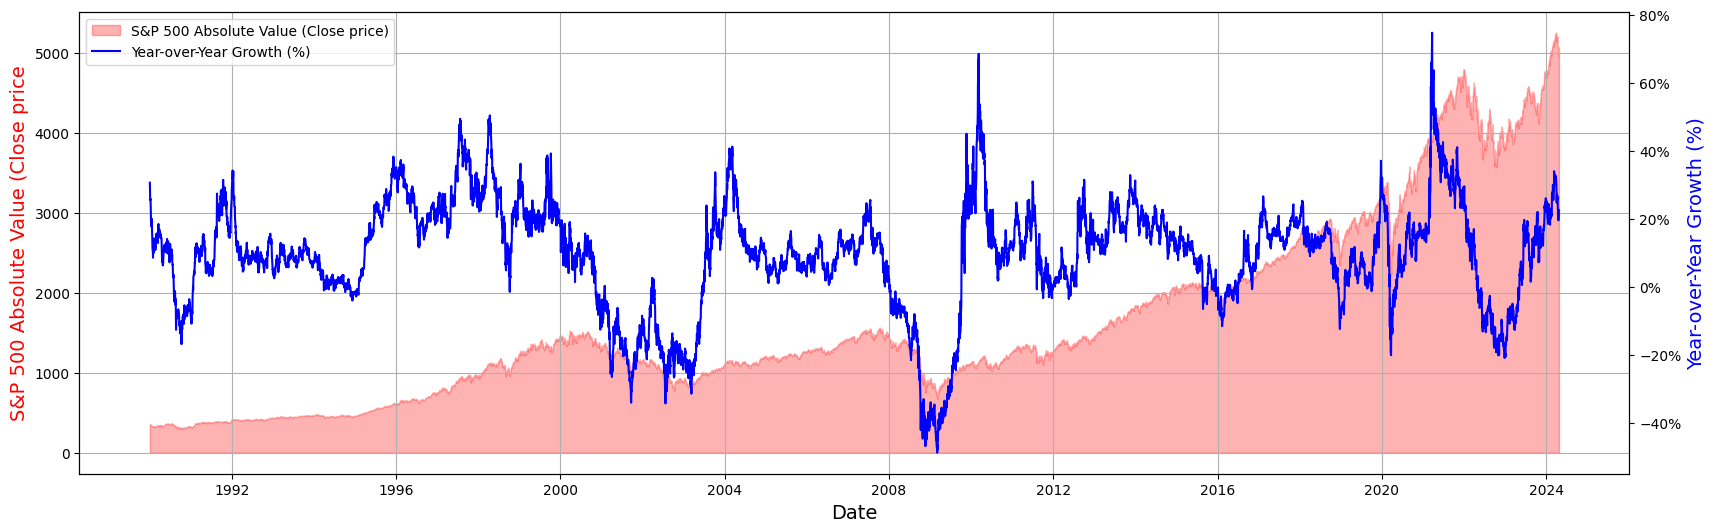

In [18]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# 2) Data Sources for Stocks

## 2.1 OHLCV data daily - INDEXES

In [19]:
# INDEXES from Yahoo Finance
# DAX index (XETRA - XETRA Delayed Price. Currency in EUR)
# WEB: https://finance.yahoo.com/quote/%5EGDAXI
dax_daily = yf.download(tickers = "^GDAXI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [20]:
dax_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-19,17834.830078,17834.869141,17626.900391,17737.359375,17737.359375,79447700
2024-04-22,17738.039062,17889.470703,17738.039062,17860.800781,17860.800781,62454400
2024-04-23,17861.199219,18144.660156,17861.199219,18137.650391,18137.650391,68529200
2024-04-24,18140.189453,18226.320312,18060.259766,18088.699219,18088.699219,75104600
2024-04-25,18088.169922,18100.750000,18021.740234,18038.849609,18038.849609,0


In [21]:
# normally 252 trading days
dax_daily['adj_close_last_year'] = dax_daily['Adj Close'].shift(252)
dax_daily['yoy_growth'] = dax_daily['Adj Close'] / dax_daily['adj_close_last_year'] -1

In [22]:
dax_daily

,Open,High,Low,Close,Adj Close,Volume,adj_close_last_year,yoy_growth
Date,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,NaN,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,NaN,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,NaN,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-19,17834.830078,17834.869141,17626.900391,17737.359375,17737.359375,79447700,15872.129883,0.117516
2024-04-22,17738.039062,17889.470703,17738.039062,17860.800781,17860.800781,62454400,15795.730469,0.130736
2024-04-23,17861.199219,18144.660156,17861.199219,18137.650391,18137.650391,68529200,15800.450195,0.147920


<Axes: xlabel='Date'>

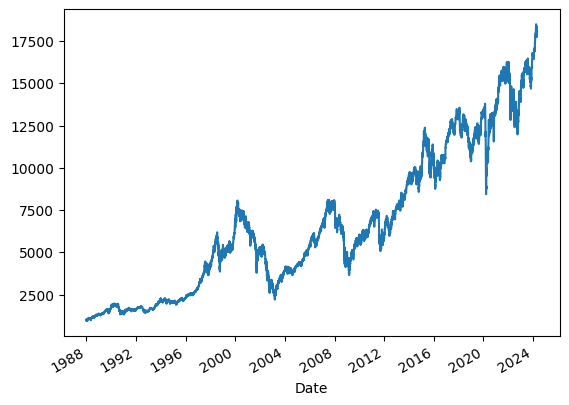

In [23]:
dax_daily['Adj Close'].plot.line()

In [24]:
# delayed 15 min : https://finance.yahoo.com/quote/%5ESPX/
# S&P 500 INDEX : Chicago Options - Chicago Options Delayed Price. Currency in USD
snp500_daily = yf.download(tickers = "^SPX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [25]:
snp500_daily.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000
2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000


In [26]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [27]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000
2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000


In [28]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


## 2.2 OHLCV data daily - ETFs

In [29]:
# https://finance.yahoo.com/quote/VOO?.tsrc=fin-srch
voo_etf = yf.download(tickers = "VOO",
                     period = "max",
                     interval = "1d")


[*********************100%%**********************]  1 of 1 completed


In [30]:
voo_etf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,461.359985,463.299988,458.209991,458.940002,458.940002,5637300
2024-04-19,458.989990,459.940002,453.899994,455.100006,455.100006,9766100
2024-04-22,457.549988,461.730011,455.350006,459.049988,459.049988,5818100
2024-04-23,461.179993,465.130005,460.670013,464.839996,464.839996,4257400
2024-04-24,465.570007,466.309998,462.440002,464.500000,464.500000,7677000


In [82]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [32]:
epi_etf_daily.head()
print(epi_etf_daily.shape)

(4069, 6)


In [33]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[(epi_etf_daily.index >='2023-06-23') & (epi_etf_daily.index <='2023-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,34.029999,34.150002,33.930000,34.020000,33.960003,344100
2023-06-26,34.110001,34.160000,34.049999,34.080002,34.080002,634600
2023-06-27,34.279999,34.310001,34.230000,34.310001,34.310001,417100
2023-06-28,34.410000,34.529999,34.389999,34.529999,34.529999,454400


In [34]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2022-06-23') & (epi_etf_daily.index <='2022-06-28')]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-23,31.129999,31.26,31.000000,31.200001,29.303230,607700
2022-06-24,29.549999,29.91,29.500000,29.900000,29.847267,387900
2022-06-27,29.799999,29.82,29.660000,29.709999,29.657600,225400
2022-06-28,29.709999,29.76,29.389999,29.420000,29.368114,466600


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

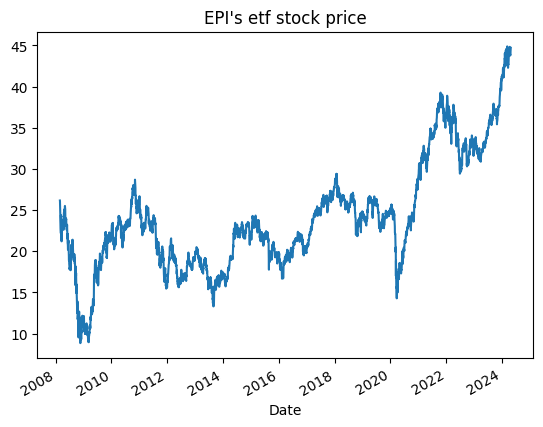

In [35]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [36]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [37]:
# get dividends as Series
epi.get_dividends()

Date
2008-12-22 00:00:00-05:00    0.091
2009-03-23 00:00:00-04:00    0.007
2009-06-22 00:00:00-04:00    0.002
2009-09-21 00:00:00-04:00    0.045
2009-12-21 00:00:00-05:00    0.006
2010-06-28 00:00:00-04:00    0.065
2010-09-20 00:00:00-04:00    0.065
2010-12-22 00:00:00-05:00    0.013
2011-06-22 00:00:00-04:00    0.062
2011-09-26 00:00:00-04:00    0.098
2012-03-26 00:00:00-04:00    0.010
2012-06-25 00:00:00-04:00    0.045
2012-09-24 00:00:00-04:00    0.083
2012-12-24 00:00:00-05:00    0.024
2013-06-24 00:00:00-04:00    0.068
2013-09-23 00:00:00-04:00    0.063
2014-03-24 00:00:00-04:00    0.099
2014-06-23 00:00:00-04:00    0.059
2014-09-22 00:00:00-04:00    0.068
2015-03-23 00:00:00-04:00    0.031
2015-06-22 00:00:00-04:00    0.067
2015-09-21 00:00:00-04:00    0.116
2015-12-21 00:00:00-05:00    0.024
2016-03-21 00:00:00-04:00    0.010
2016-06-20 00:00:00-04:00    0.125
2016-09-26 00:00:00-04:00    0.070
2016-12-23 00:00:00-05:00    0.006
2017-03-27 00:00:00-04:00    0.075
2017-06-26 00:0

## 2.3 Paid data - Poligon.io (news endpoint)

In [38]:
# Please read the article (section "Polygon.io News API"): https://pythoninvest.com/long-read/chatgpt-api-for-financial-news-summarization

In [39]:
# Endpoint: https://polygon.io/docs/stocks/get_v2_reference_news

## 2.4 Macroeconomics

* add some indicator examples

In [40]:
# Gold reserves excl. gold for China
# https://fred.stlouisfed.org/series/TRESEGCNM052N

In [41]:
gold_reserves = pdr.DataReader("TRESEGCNM052N", "fred", start=start)

<Axes: xlabel='DATE'>

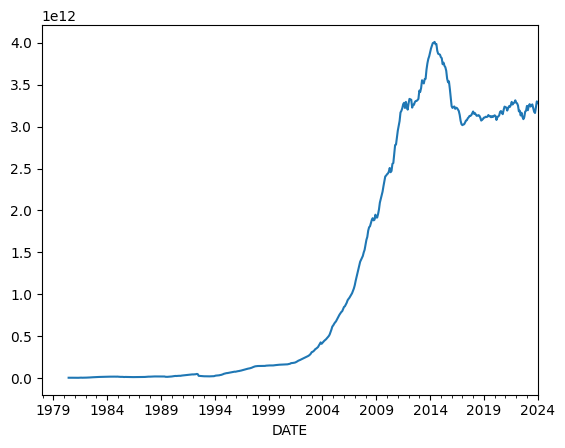

In [42]:
gold_reserves.TRESEGCNM052N.plot.line()

In [43]:
#  CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gold_volatility = pdr.DataReader("GVZCLS", "fred", start=start)

<Axes: xlabel='DATE'>

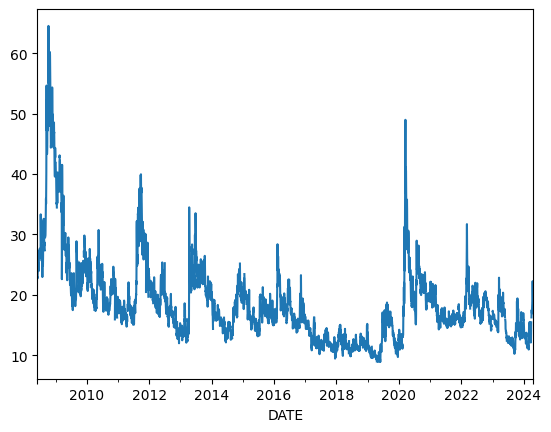

In [44]:
gold_volatility.GVZCLS.plot.line()

In [45]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
oil_wti = pdr.DataReader("DCOILWTICO", "fred", start=start)

<Axes: xlabel='DATE'>

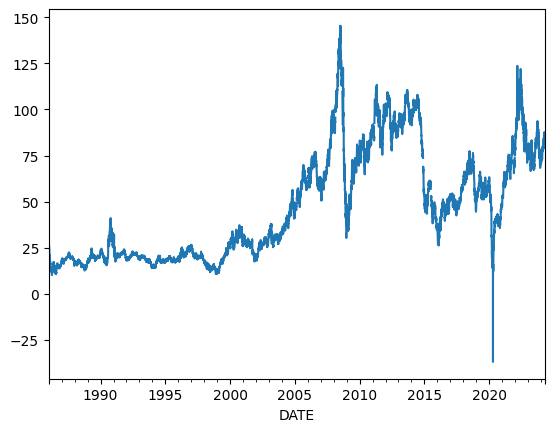

In [46]:
# there is a bug in the data? negative price?
oil_wti.DCOILWTICO.plot.line()

In [47]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU)
# https://fred.stlouisfed.org/series/DCOILBRENTEU
oil_brent = pdr.DataReader("DCOILBRENTEU", "fred", start=start)

<Axes: xlabel='DATE'>

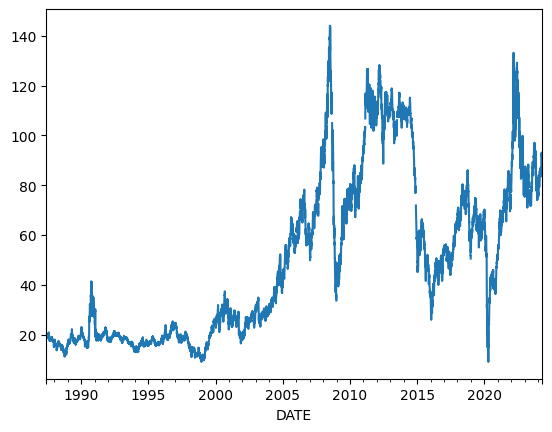

In [48]:
oil_brent.DCOILBRENTEU.plot.line()

In [49]:
# Web Scraping for Macro
# can't call directly via pd.read_html() as it returns 403 (forbidden) --> need to do a bit of work, but still no Selenium
# https://tradingeconomics.com/united-states/indicators
import requests
from bs4 import BeautifulSoup


url = "https://tradingeconomics.com/united-states/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [50]:

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # You need to be able to find this table tag and read all behind it
    # Find the div with class "table-responsive"
    table_div = soup.find("div", class_="table-responsive")

    # Extract the table within the div
    table = table_div.find("table")

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Assuming there's only one table, otherwise, loop through the list

    # Display the DataFrame
    print(df)
else:
    print("Failed to retrieve data from the webpage.")

                  Unnamed: 0    Last  Previous  Highest    Lowest  \
0                   Currency   106.0     106.0   165.00     70.70   
1               Stock Market  5038.0    5072.0  5268.00      4.40   
2            GDP Growth Rate     3.4       4.9    34.80    -28.00   
3     GDP Annual Growth Rate     3.1       2.9    13.40     -7.50   
4          Unemployment Rate     3.8       3.9    14.90      2.50   
5          Non Farm Payrolls   303.0     270.0  4615.00 -20477.00   
6             Inflation Rate     3.5       3.2    23.70    -15.80   
7         Inflation Rate MoM     0.4       0.4     2.00     -1.80   
8              Interest Rate     5.5       5.5    20.00      0.25   
9           Balance of Trade   -68.9     -67.6     1.95   -103.00   
10           Current Account  -195.0    -196.0     9.96   -284.00   
11    Current Account to GDP    -3.0      -3.8     0.20     -6.00   
12    Government Debt to GDP   129.0     127.0   129.00     31.80   
13         Government Budget    -5

In [51]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,106.0,106.0,165.00,70.70,NaN,Apr/24
1,Stock Market,5038.0,5072.0,5268.00,4.40,points,Apr/24
2,GDP Growth Rate,3.4,4.9,34.80,-28.00,percent,Dec/23
3,GDP Annual Growth Rate,3.1,2.9,13.40,-7.50,percent,Dec/23
4,Unemployment Rate,3.8,3.9,14.90,2.50,percent,Mar/24
5,Non Farm Payrolls,303.0,270.0,4615.00,-20477.00,Thousand,Mar/24
6,Inflation Rate,3.5,3.2,23.70,-15.80,percent,Mar/24
7,Inflation Rate MoM,0.4,0.4,2.00,-1.80,percent,Mar/24
8,Interest Rate,5.5,5.5,20.00,0.25,percent,Mar/24
9,Balance of Trade,-68.9,-67.6,1.95,-103.00,USD Billion,Feb/24


## 2.5) Financial reporting - EDGAR (in Yahoo)

In [52]:
# let's check for NVDA
nvda =  yf.Ticker('NVDA')

In [53]:
# yearly financials for the last 4 years
nvda.financials


,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Tax Effect Of Unusual Items,0.0,-284130000.0,0.0,0.0
Tax Rate For Calcs,0.12,0.21,0.019,0.017
Normalized EBITDA,35583000000.0,7340000000.0,11351000000.0,5691000000.0
Total Unusual Items,0.0,-1353000000.0,0.0,0.0
Total Unusual Items Excluding Goodwill,0.0,-1353000000.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,29760000000.0,4368000000.0,9752000000.0,4332000000.0
Reconciled Depreciation,1508000000.0,1544000000.0,1174000000.0,1098000000.0
Reconciled Cost Of Revenue,16621000000.0,11618000000.0,9439000000.0,6279000000.0
EBITDA,35583000000.0,5987000000.0,11351000000.0,5691000000.0
EBIT,34075000000.0,4443000000.0,10177000000.0,4593000000.0


In [54]:
# balance sheet
nvda.balance_sheet

,2024-01-31,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,NaN,1380000000.0
Ordinary Shares Number,2464000000.0,2466136572.0,2506000000.0,2480000000.0
Share Issued,2464000000.0,2466136572.0,2506000000.0,3860000000.0
Net Debt,2429000000.0,7564000000.0,8956000000.0,6116000000.0
Total Debt,11056000000.0,12031000000.0,11831000000.0,7597000000.0
...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,-21000000.0
Gross Accounts Receivable,NaN,NaN,NaN,2450000000.0
Cash Cash Equivalents And Short Term Investments,25984000000.0,13296000000.0,21208000000.0,11561000000.0
Other Short Term Investments,18704000000.0,9907000000.0,19218000000.0,10714000000.0


In [55]:
# Basic info:
nvda.basic_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [56]:
# marketCap is quite useful, but don't know when it was updated? Daily?
nvda.basic_info['marketCap']/1e9

1991.925048828125

In [57]:
# read this article for full info: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

## 2.6 Web Scraping - company info for clustering

In [58]:
# ask chatGPT: emulate clicking the link and downloading the content
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

# Define headers with a user-agent to mimic a web browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the webpage
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the download link within the webpage
    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})

    # If the download link is found
    if download_link:
        # Extract the href attribute which contains the actual download link
        download_url = 'https://companiesmarketcap.com/'+download_link["href"]

        # Download the CSV file using the obtained download URL
        download_response = requests.get(download_url, headers=headers)

        # Check if the download request was successful
        if download_response.status_code == 200:
            # Save the content of the response to a local file
            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [59]:
global_stocks = pd.read_csv("/content/global_stocks.csv")

In [60]:
global_stocks.head()

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Microsoft,MSFT,3039495716864,409.06,United States
1,2,Apple,AAPL,2609989812224,169.02,United States
2,3,NVIDIA,NVDA,1991925039104,796.77,United States
3,4,Alphabet (Google),GOOG,1989633376256,161.10,United States
4,5,Saudi Aramco,2222.SR,1942937141052,8.03,Saudi Arabia


In [61]:
global_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         8386 non-null   int64  
 1   Name         8386 non-null   object 
 2   Symbol       8385 non-null   object 
 3   marketcap    8386 non-null   int64  
 4   price (USD)  8386 non-null   float64
 5   country      8384 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 393.2+ KB


# 3) Homework week 1

In this homework, we're going to download finance data from various sources and make simple calculations/analysis.

## Question 1: [Macro] Average growth of GDP in 2023

### What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [62]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=25
Period for indexes: 1954-04-25 to 2024-04-25 


In [63]:
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [64]:
gdpc1['gdppot_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1


In [65]:
gdpc1.tail()

,GDPC1,gdppot_us_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


## Question 2. [Macro] Inverse "Treasury Yield"

### Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [66]:
# https://fred.stlouisfed.org/series/DGS2
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs2.tail()

,DGS2
DATE,
2024-04-17,4.93
2024-04-18,4.98
2024-04-19,4.97
2024-04-22,4.97
2024-04-23,4.86


In [67]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail()

,DGS10
DATE,
2024-04-17,4.59
2024-04-18,4.64
2024-04-19,4.62
2024-04-22,4.62
2024-04-23,4.61


In [68]:
dgs_yield = pd.concat([dgs2, dgs10], axis=1)

In [69]:
dgs_yield.tail()

,DGS2,DGS10
DATE,,
2024-04-17,4.93,4.59
2024-04-18,4.98,4.64
2024-04-19,4.97,4.62
2024-04-22,4.97,4.62
2024-04-23,4.86,4.61


In [70]:
dgs_yield['diff_dgs10-dgs2_daily'] = dgs_yield['DGS10'] - dgs_yield['DGS2']

In [71]:
dgs_yield.tail()

,DGS2,DGS10,diff_dgs10-dgs2_daily
DATE,,,
2024-04-17,4.93,4.59,-0.34
2024-04-18,4.98,4.64,-0.34
2024-04-19,4.97,4.62,-0.35
2024-04-22,4.97,4.62,-0.35
2024-04-23,4.86,4.61,-0.25


In [72]:
dgs_yield.index

DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11',
               '1962-01-12', '1962-01-15',
               ...
               '2024-04-10', '2024-04-11', '2024-04-12', '2024-04-15',
               '2024-04-16', '2024-04-17', '2024-04-18', '2024-04-19',
               '2024-04-22', '2024-04-23'],
              dtype='datetime64[ns]', name='DATE', length=16256, freq='B')

In [73]:
dgs_yield[dgs_yield.index >= '2000-01-01'].describe()

,DGS2,DGS10,diff_dgs10-dgs2_daily
count,6081.000000,6081.000000,6081.000000
mean,2.139281,3.257449,1.118168
std,1.761070,1.314089,0.975978
min,0.090000,0.520000,-1.080000
25%,0.610000,2.190000,0.240000
50%,1.640000,3.180000,1.190000
75%,3.540000,4.270000,1.930000
max,6.930000,6.790000,2.910000


## Question 3. [Index] Which Index is better recently?

### Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [74]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [75]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
ipc_Mexico_daily_non_delayed = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [76]:
snp500_daily_non_delayed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [77]:
snp500_daily_non_delayed['snp500_5y_growth'] = snp500_daily_non_delayed['Adj Close']/snp500_daily_non_delayed['Adj Close'].shift(365*5)-1

In [78]:
snp500_daily_non_delayed.tail()

,Open,High,Low,Close,Adj Close,Volume,snp500_5y_growth
Date,,,,,,,
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000,1.209596
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000,1.186387
2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000,1.213466
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000,1.232434
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000,1.238933


In [79]:
snp500_daily_non_delayed[(snp500_daily_non_delayed.index >= '2019-04-09') & (snp500_daily_non_delayed.index <= '2024-04-09')].describe()

,Open,High,Low,Close,Adj Close,Volume,snp500_5y_growth
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,3877.220299,3900.323124,3852.806361,3878.116760,3878.116760,4.322946e+09,1.128161
std,645.794942,646.449221,645.947151,646.384109,646.384109,1.062237e+09,0.162779
min,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.296530e+09,0.558284
25%,3283.840088,3300.694946,3266.049927,3283.404907,3283.404907,3.696585e+09,1.017953
50%,3976.820068,4007.659912,3944.810059,3974.540039,3974.540039,4.075680e+09,1.155834
75%,4384.469971,4413.925049,4361.474854,4386.850098,4386.850098,4.694420e+09,1.239256
max,5257.970215,5264.850098,5245.819824,5254.350098,5254.350098,9.976520e+09,1.517096


In [80]:
ipc_Mexico_daily_non_delayed['5y_growth'] = ipc_Mexico_daily_non_delayed['Adj Close']/ipc_Mexico_daily_non_delayed['Adj Close'].shift(365*5)-1

In [81]:
ipc_Mexico_daily_non_delayed[(ipc_Mexico_daily_non_delayed.index >= '2019-04-09') & (ipc_Mexico_daily_non_delayed.index <= '2024-04-09')].describe()

,Open,High,Low,Close,Adj Close,Volume,5y_growth
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,3877.220299,3900.323124,3852.806361,3878.116760,3878.116760,4.322946e+09,1.128161
std,645.794942,646.449221,645.947151,646.384109,646.384109,1.062237e+09,0.162779
min,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.296530e+09,0.558284
25%,3283.840088,3300.694946,3266.049927,3283.404907,3283.404907,3.696585e+09,1.017953
50%,3976.820068,4007.659912,3944.810059,3974.540039,3974.540039,4.075680e+09,1.155834
75%,4384.469971,4413.925049,4361.474854,4386.850098,4386.850098,4.694420e+09,1.239256
max,5257.970215,5264.850098,5245.819824,5254.350098,5254.350098,9.976520e+09,1.517096


## Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks

### Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [97]:
# ETFs
# e.g. 2222.SR
#   WEB: https://finance.yahoo.com/quote/2222.SR/history

stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

for stock in stocks:
  print(f"\nprocessing stock {stock}")
  etf_daily = yf.download(tickers = stock,
                      period = "max",
                      interval = "1d")
  etf_daily = etf_daily[(etf_daily.index >= '2023-01-01') & (etf_daily.index <= '2023-12-31')]
  stats = etf_daily.describe()
  mxm = stats['Adj Close'].max()
  mnm = stats['Adj Close'].min()
  adj_close_ratio = (mxm-mnm)/mxm

  print(f"adj_close_ratio: {adj_close_ratio}")

#   epi = yf.Ticker(stock)
# epi.get_actions()
# stats['Adj Close'].max()

etf_daily.index



processing stock 2222.SR


[*********************100%%**********************]  1 of 1 completed


adj_close_ratio: 0.9915115782785411

processing stock BRK-B


[*********************100%%**********************]  1 of 1 completed


adj_close_ratio: 0.9447363110289665

processing stock AAPL


[*********************100%%**********************]  1 of 1 completed


adj_close_ratio: 0.9300727358465511

processing stock MSFT


[*********************100%%**********************]  1 of 1 completed


adj_close_ratio: 0.8915080032089518

processing stock GOOG


[*********************100%%**********************]  1 of 1 completed


adj_close_ratio: 0.9345069255203716

processing stock JPM


[*********************100%%**********************]  1 of 1 completed

adj_close_ratio: 0.9604600993503373


DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

## Question 5. [Stocks] Dividend Yield

### Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximum value in % and round to 1 digit after the decimal point. (E.g., if you obtained \$1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [122]:
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

for stock in stocks:
  print(f"\nprocessing stock {stock}")

  etf_daily = yf.download(tickers = stock,
                      period = "max",
                      interval = "1d")
  etf_daily = etf_daily[(etf_daily.index >= '2023-01-01') & (etf_daily.index <= '2023-12-31')]
  last_closing_price = etf_daily.iloc[-1]['Adj Close']
  print(f"last_closing_price: {last_closing_price}")

  epi = yf.Ticker(stock)
  epi = epi.history(start='2023-01-01', end='2023-12-31')

  div_sum = epi.Dividends.sum()
  print(f"div_sum: {div_sum}")

  divident_yield = (div_sum*100) / last_closing_price
  print(f"divident_yield: {divident_yield}")

[*********************100%%**********************]  1 of 1 completed


processing stock 2222.SR
last_closing_price: 32.82804870605469
div_sum: 0.9107640000000001
divident_yield: 2.774347047413823

processing stock BRK-B



[*********************100%%**********************]  1 of 1 completed


last_closing_price: 356.6600036621094
div_sum: 0.0
divident_yield: 0.0

processing stock AAPL


[*********************100%%**********************]  1 of 1 completed


last_closing_price: 192.28463745117188
div_sum: 0.95
divident_yield: 0.4940592304162832

processing stock MSFT


[*********************100%%**********************]  1 of 1 completed


last_closing_price: 375.34588623046875
div_sum: 2.79
divident_yield: 0.7433143940964608

processing stock GOOG


[*********************100%%**********************]  1 of 1 completed


last_closing_price: 140.92999267578125
div_sum: 0.0
divident_yield: 0.0

processing stock JPM


[*********************100%%**********************]  1 of 1 completed

last_closing_price: 168.07713317871094
div_sum: 4.05
divident_yield: 2.4096079718909573


## Question 6. [Exploratory] Investigate new metrics

### Free text answer

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

## Question 7. [Exploratory] Time-driven strategy description around earnings releases

### Free text answer

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.